# Colocando Modelos em Produção Part1

<div>
<img src="imgs/andre-barbosa.png" width="200"/>
</div>

Esse sou eu :)

- DS @QuintoAndar
- Mestrando @IME-USP
- [pode mandar mensagem a vonts, só avisa de onde você veio :)](https://www.linkedin.com/in/barbosaandre)

In [1]:
!ls ../data/houses/

data_description.txt house_dataset.csv


In [2]:
!head -n 100 ../data/houses/data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

# Agenda

- Colocando Modelos em Produção
- Mas o que vamos produtizar?
- Treinando o Modelo
- Pipelines
- Salvando modelo
- Containers

# Colocando Modelos em Produção



## Mas o que é colcoar algo em produção?

[Em tradução livre do stack overflow](https://softwareengineering.stackexchange.com/questions/68136/why-do-we-call-it-production)

>  Eu acho que o termo "produção" vêm de outras industrias como a automobilística ou eletrônica, onde uma vez que o componente/produto estava pronto para ser usado, ele poderia entrar para linha de "produção" para construir o produto final. Em terminologia de softwate, o termo "ambiente de produção" significa que as pessoas tem **acesso à parte do seu software para fazer algo de valor**.

# Legal! Mas o que vamos produtizar?

Que tal imaginarmos o seguinte cenário:

> Pense que você trabalha em uma _imobiliária digital_ e que você quer desenolver um serviço para ajudar o seus clientes a precificar o imóvel que eles querem vender. Para isso, então, eles devem preencher um formulário e, ao submeterem, eles recebem o preço sugerido.

Primeiro, vamos ao dataset

In [3]:
import pandas as pd

pd.options.display.max_rows = 60
pd.options.display.max_columns = 100
df = pd.read_csv("../data/houses/house_dataset.csv").drop(columns=["Id"])
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Treinamento do Modelo

In [4]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate, train_test_split

np.random.seed(42)

In [5]:
#Vamos usar só três features hoje
numerical_features = [
    "LotArea",
    "OverallQual",
    "YearBuilt",
]
label = "SalePrice"

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    df[numerical_features], df[[label]], random_state=42
)

In [7]:
imp_median_ft = SimpleImputer(missing_values=np.nan, strategy="median")
sc_ft = StandardScaler()
sc_target = StandardScaler()
linear_model = Ridge(alpha=0.3)

In [8]:
X_train[numerical_features] = imp_median_ft.fit_transform(X_train[numerical_features])
X_train[numerical_features] = sc_ft.fit_transform(X_train[numerical_features])

X_test[numerical_features] = imp_median_ft.transform(X_test[numerical_features])
X_test[numerical_features] = sc_ft.transform(X_test[numerical_features])

In [9]:
y_train[[label]] = sc_target.fit_transform(y_train[[label]])

y_test[[label]] = sc_target.transform(y_test[[label]])

In [10]:
linear_model = Ridge(alpha=0.3, normalize=False)
linear_model.fit(X_train, y_train)

Ridge(alpha=0.3)

In [11]:
r2_score(y_test, linear_model.predict(X_test))

0.6784271939918106

# O que faríamos para colocar ele no ar?

O ideal seria salvar os o que a gente fez e carregar isso em outro lugar

In [12]:
from joblib import dump, load
dump(imp_median_ft, f"model_persistence/input_na.joblib")
dump(sc_ft, f"model_persistence/sc_ft.joblib")
dump(sc_target, f"model_persistence/sc_target.joblib")
dump(linear_model, f"model_persistence/linear_model.joblib")

['model_persistence/linear_model.joblib']

In [13]:
from joblib import dump, load
import pandas as pd

In [14]:
!ls model_persistence/

input_na.joblib     pipeline.joblib     sc_target.joblib
linear_model.joblib sc_ft.joblib


In [15]:
inputer = load('model_persistence/input_na.joblib')
standard_ft = load('model_persistence/sc_ft.joblib')
sc_tg = load('model_persistence/sc_target.joblib')
clf = load('model_persistence/linear_model.joblib')

Vamos simular como se tivesse algo no ar

In [16]:
sample = pd.read_csv('../data/houses/house_dataset.csv').drop(columns=['Id', 'SalePrice']).sample(5,
                                                                                                  random_state=42)

In [17]:
sample.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,20,RL,70.0,8414,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,6,8,1963,2003,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,GLQ,663,Unf,0,396,1059,GasA,TA,Y,SBrkr,1068,0,0,1068,0,1,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1963.0,RFn,1,264,TA,TA,Y,192,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2006,WD,Normal
1105,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1994,1995,Gable,CompShg,HdBoard,HdBoard,BrkFace,362.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1032,Unf,0,431,1463,GasA,Ex,Y,SBrkr,1500,1122,0,2622,1,0,2,1,3,1,Gd,9,Typ,2,TA,Attchd,1994.0,RFn,2,712,TA,TA,Y,186,32,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
413,30,RM,56.0,8960,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,6,1927,1950,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1008,1008,GasA,Gd,Y,FuseA,1028,0,0,1028,0,0,1,0,2,1,TA,5,Typ,1,Gd,Detchd,1927.0,Unf,2,360,TA,TA,Y,0,0,130,0,0,0,NaN,NaN,NaN,0,3,2010,WD,Normal
522,50,RM,50.0,5000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Feedr,Norm,1Fam,1.5Fin,6,7,1947,1950,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,Gd,CBlock,TA,TA,No,ALQ,399,Unf,0,605,1004,GasA,Ex,Y,SBrkr,1004,660,0,1664,0,0,2,0,3,1,TA,7,Typ,2,Gd,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,24,36,0,0,0,NaN,NaN,NaN,0,10,2006,WD,Normal
1036,20,RL,89.0,12898,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,9,5,2007,2008,Hip,CompShg,VinylSd,VinylSd,Stone,70.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1022,Unf,0,598,1620,GasA,Ex,Y,SBrkr,1620,0,0,1620,1,0,2,0,2,1,Ex,6,Typ,1,Ex,Attchd,2008.0,Fin,3,912,TA,TA,Y,228,0,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal


In [18]:
sample_transformed = inputer.transform(sample[numerical_features])
sample_transformed = standard_ft.transform(sample_transformed)

In [19]:
clf.predict(sample_transformed)

array([[-0.1407194 ],
       [ 1.07185273],
       [-0.78847804],
       [-0.26738076],
       [ 1.64518166]])

In [20]:
sc_tg.inverse_transform(
    clf.predict(sample_transformed)
)

array([[170747.50467003],
       [265230.49257547],
       [120274.48908108],
       [160878.11752725],
       [309903.98371623]])

# Mas será que podemos fazer melhor?

[Para quem tiver interesse, vale ver aqui](https://www.d.umn.edu/~gshute/softeng/principles.html)

Mas um princípio bom de engenharia de software é que você tenha um código mais _conciso_ e modular. Isso ajuda na manutenção do código :) 

## O conceito de pipelines


> Pipeline can be used to chain multiple estimators into one. This is useful as there is often a fixed sequence of steps in processing the data, for example feature selection, normalization and classification. Pipeline serves multiple purposes here:


>**Convenience and encapsulation**: You only have to call fit and predict once on your data to fit a whole sequence of estimators.



>**Joint parameter selection**: You can grid search over parameters of all estimators in the pipeline at once.

>**Safety**: Pipelines help avoid leaking statistics from your test data into the trained model in cross-validation, by ensuring that the same samples are used to train the transformers and predictors.

[fonte](https://scikit-learn.org/stable/modules/compose.html#pipeline)

Contudo, vale lembrar:

> The scikit-learn original Pipeline does not change the y or the number of samples in X and y during the steps.

[fonte](https://stackoverflow.com/questions/55858788/is-it-possible-to-add-transformedtargetregressor-into-a-scikit-learn-pipeline)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    df[numerical_features], df[[label]], random_state=42
)

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import RandomizedSearchCV
imp_median = SimpleImputer(missing_values=np.nan, strategy="median")
sc = StandardScaler()
linear_model = Ridge()

In [23]:
regr = TransformedTargetRegressor(regressor=linear_model,
                                  transformer=StandardScaler())

In [24]:
regr.get_params().keys()

dict_keys(['check_inverse', 'func', 'inverse_func', 'regressor__alpha', 'regressor__copy_X', 'regressor__fit_intercept', 'regressor__max_iter', 'regressor__normalize', 'regressor__random_state', 'regressor__solver', 'regressor__tol', 'regressor', 'transformer__copy', 'transformer__with_mean', 'transformer__with_std', 'transformer'])

In [25]:
# do search
param_dist = {
          'regressor__alpha': np.random.normal(loc=3, scale=1, size=100), #media 3 std 1
}
search = RandomizedSearchCV(regr,param_distributions=param_dist, n_iter=100)

In [26]:
steps = [
    ("input_median", imp_median),
    ("standard_scaler", sc),
    ("linear_regression", search),
]

In [27]:
pipeline = Pipeline(steps)

In [28]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('input_median', SimpleImputer(strategy='median')),
                ('standard_scaler', StandardScaler()),
                ('linear_regression',
                 RandomizedSearchCV(estimator=TransformedTargetRegressor(regressor=Ridge(),
                                                                         transformer=StandardScaler()),
                                    n_iter=100,
                                    param_distributions={'regressor__alpha': array([3.49671415, 2.8617357 , 3.64768854, 4.52302986, 2.76584663,
       2.76586304...
       4.35624003, 2.92798988, 4.0035329 , 3.36163603, 2.35488025,
       3.36139561, 4.53803657, 2.96417396, 4.56464366, 0.3802549 ,
       3.8219025 , 3.08704707, 2.70099265, 3.09176078, 1.01243109,
       2.78032811, 3.35711257, 4.47789404, 2.48172978, 2.1915064 ,
       2.49824296, 3.91540212, 3.32875111, 2.4702398 , 3.51326743,
       3.09707755, 3.96864499, 2.29794691, 2.67233785, 2.60789185,
       1.53648505, 3.2961202

In [29]:
pipeline.named_steps['linear_regression'].best_params_

{'regressor__alpha': 4.852278184508938}

In [30]:
r2_score(y_test, pipeline.predict(X_test))

0.6780654619986706

In [31]:
dump(pipeline, f"model_persistence/pipeline.joblib")

['model_persistence/pipeline.joblib']

In [32]:
pipe_persist = load('model_persistence/pipeline.joblib')

In [33]:
sample[numerical_features]

,LotArea,OverallQual,YearBuilt
892,8414,6,1963
1105,12256,8,1994
413,8960,5,1927
522,5000,6,1947
1036,12898,9,2007


In [34]:
pipe_persist.predict(sample[numerical_features])

array([[170750.4209918 ],
       [264921.82331946],
       [120344.48133506],
       [160829.03894039],
       [309433.80578024]])

Mais _consiso_, mais _liimpo_ e mais _a prova de falhas_, uma vez que **toda** responsabilidade está centralizada em um cara só.

# Tá, mas e aí?

Beleza e show! Você conseguiu ter o seu código de maneira organizada e isolada. Mas o que a gente faz com ele?


Bom, primeiro, que tal usarmos o conceito de *modularização* de engenharia de software e quebrar ele nas etapas que mais interessam a gente?


Que tal se a gente quebrar esse código em dois _scripts_:



 - Um train, **lê** os dados,  **cria**, **printa métricas interessantes** e **salva**
 
 - Um predict, que **carrega** a pipeline, e executa a função predict com base no que passarmos **por linha de comando** 

# E como salva?

- Vale passar por dois processos: `black` e `isort` :)

- E se estivessemos trabalhando em um time?

- E se fizermos mudanças nos códigos (e.g. alteramos o modelo), comos temos o controle de versão?

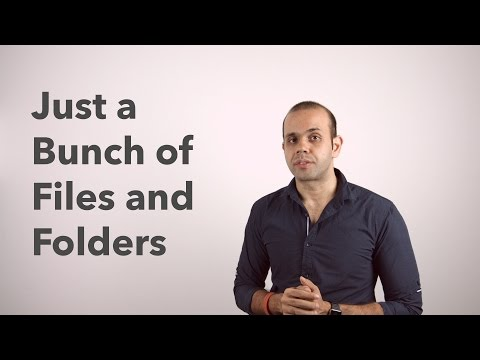

In [35]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('uUuTYDg9XoI')

Para quem quiser ver com mais detalhes, [aqui tem uma das referências mais completas e didáticas](https://missing.csail.mit.edu/2020/version-control/) sobre o funcionamento de Git na prática, além de exercícios :)

# Mas e o servidor?

Ótimo, aprendemos como desenvolver código em equipe e salvar ele no servidor. Mas queremos rodar nosso produto para os clientes terem acesso, certo? Então a gente precisa rodar o código de inferência em um servidor, certo?



- Mas e se o servidor for diferente da minha máquina?

![](https://media.giphy.com/media/j5QjnvhyKI8LM0tXK3/giphy.gif)

## Máquinas Virtuais

Calma! O ideal é que a gente consiga emular uma máquina virtual tanto localmente, quanto no servidor e aí teríamos uma certa garantia que estamos rodando _a mesma coisa_. Além disso, estamos em um mundo de cloud, então seria incrível se conseguissemos alugar infra estruturas dependendo da nossa demanda mas que todas elas tenham exatamente o mesmo sistema operacional, certo?

Vamos dar uma aprofundada aqui.

PS: toda essa sessão foi xupinhada [daqui](https://missing.csail.mit.edu/2019/virtual-machines/)

> Virtual machines are simulated computers. You can configure a guest virtual machine with some operating system and configuration and use it without affecting your host environment.
> In general, VMs have lots of uses. They are commonly used for running software that only runs on a certain operating system (e.g. using a Windows VM on Linux to run Windows-specific software).



### Useful features
> Isolation: hypervisors do a pretty good job of isolating the guest from the host, so you can use VMs to run buggy or untrusted software reasonably safely.

> Snapshots: you can take “snapshots” of your virtual machine, capturing the entire machine state (disk, memory, etc.), make changes to your machine, and then restore to an earlier state. This is useful for testing out potentially destructive actions, among other things.



### Disadvantages
Virtual machines are generally slower than running on bare metal, so they may be unsuitable for certain applications.

Se elas são instáveis e mais lentas, será que dá pra melhorar?

## Docker

![](imgs/docker-meme.jpg)

> Virtual Machines are relatively heavy-weight; what if you want to spin up machines in an automated fashion? Enter containers!

>The performance boost comes from the fact that unlike VMs which run an entire copy of the operating system, containers share the linux kernel with the host. However note that if you are running linux containers on Windows/macOS a Linux VM will need to be active as a middle layer between the two.

Ou seja, ainda não podemos usar Docker para rodar games Windows em um Linux :(

Contudo, tanto o Mac e o Windows possuem uma mini-VM de Linux dentro para podermos rodar aplicações dentro delas :)

![](imgs/containes-vs-vm.png)

Comparison between Docker containers and Virtual Machines. Credit: blog.docker.com

> Moreover, container software like Docker has also been extensively used as a solution for dependency hell. If a machine needs to be running many services with conflicting dependencies they can be isolated using containers.

## Dockerizando nossa aplicação

Usually, you write a file that defines how to construct your container. You start with some minimal base image (like Alpine Linux), and then a list of commands to run to set up the environment you want (install packages, copy files, build stuff, write config files, etc.). Normally, there’s also a way to specify any external ports that should be available, and an entrypoint that dictates what command should be run when the container is started (like a grading script).

![](https://media.giphy.com/media/3o6wr9O7eCSG3T1y80/giphy.gif)

https://hub.docker.com/r/continuumio/miniconda/dockerfile

# Referências

[Esse curso do MIT é uma ÓTIMA referência](https://missing.csail.mit.edu/2020/)